5 - Qual unidade NWCG identificou e fez mais relatórios sobre incêndios no período entre 2001 - 2010?


6 - Quantos acres foram queimados entre 2004 - 2007?


7 - Qual mês teve o maior somatório de hectares queimados no período analisado?


8 - Um gráfico relacionando a quantidade de hectares queimados aos meses do ano no periodo total analisado. 

In [1]:
#importando os pacote

import re
import pandas as pd
import sqlite3
import numpy as np
from itertools import zip_longest
import matplotlib.pyplot as plt

In [5]:
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

### 5 - Qual unidade NWCG identificou e fez mais relatórios sobre incêndios no período entre 2001 - 2010?

In [6]:
consulta5 = """
SELECT NWCG_REPORTING_AGENCY,
        NWCG_REPORTING_UNIT_ID, 
        NWCG_REPORTING_UNIT_NAME, 
        SOURCE_REPORTING_UNIT,
        count(*) as "QUAT_RELATORIOS"
        -- "QUAT_RELATORIOS" =  QUANTIDADE DE RELATÓRIOS EMITIDOS PELA UNIDADE 
from (
        -- TABELA SECUNDARIA COM OS DADOS NESCESSARIOS PARA A CONSULTA
		SELECT NWCG_REPORTING_AGENCY,
		NWCG_REPORTING_UNIT_ID, 
		NWCG_REPORTING_UNIT_NAME, 
		SOURCE_REPORTING_UNIT
		from Fires
		where strftime('%Y', datetime(DISCOVERY_DATE)) >=  '2001' and strftime('%Y', datetime(DISCOVERY_DATE)) <=  '2010'
)
group by  NWCG_REPORTING_AGENCY,
		  NWCG_REPORTING_UNIT_ID, 
		  NWCG_REPORTING_UNIT_NAME, 
		  SOURCE_REPORTING_UNIT
order by "QUAT_RELATORIOS" DESC
"""

In [7]:
consulta5_1 = """
SELECT NWCG_REPORTING_AGENCY,
        NWCG_REPORTING_UNIT_ID, 
        NWCG_REPORTING_UNIT_NAME, 
        count(*) as "QUAT_RELATORIOS"
        -- "QUAT_RELATORIOS" =  QUANTIDADE DE RELATÓRIOS EMITIDOS PELA UNIDADE 
from (
        -- TABELA SECUNDARIA COM OS DADOS NESCESSARIOS PARA A CONSULTA
		SELECT NWCG_REPORTING_AGENCY,
		NWCG_REPORTING_UNIT_ID, 
		NWCG_REPORTING_UNIT_NAME, 
		SOURCE_REPORTING_UNIT
		from Fires
		where strftime('%Y', datetime(DISCOVERY_DATE)) >=  '2001' and strftime('%Y', datetime(DISCOVERY_DATE)) <=  '2010'
)
group by  NWCG_REPORTING_AGENCY,
		  NWCG_REPORTING_UNIT_ID, 
		  NWCG_REPORTING_UNIT_NAME
order by "QUAT_RELATORIOS" DESC
"""

In [8]:
resultado5 = pd.read_sql_query(consulta5, conn)

In [9]:
resultado5_1 = pd.read_sql_query(consulta5_1, conn)

In [13]:
display(resultado5.head(1))

,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,QUAT_RELATORIOS
0,ST/C&L,USTXTXS,Texas A & M Forest Service,TXTXS,38055


A unidade que mais identificou incendios no periodo analisado, foi a unidade Georgia Forestry Commission da agencia ST/C&L, codigo 'TXTXS' tendo identificado 38055 incendios que se iniciaram nesse periodo

In [14]:
display(resultado5_1.head(1))

,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,QUAT_RELATORIOS
0,ST/C&L,USGAGAS,Georgia Forestry Commission,68862


A unidade que mais identificou incendios no periodo analisado, foi a unidade Georgia Forestry Commission da agencia ST/C&L, tendo identificado 68862 incendios que se iniciaram nesse periodo, através de suas unidades

### 6 - Quantos acres foram queimados entre 2004 - 2007?

Nessa analise eu vou levar em conta o perimero que foi queimado, analisando os incendiso que se iniciaram e que foram controlado no periodo selecionado

In [15]:
consulta6 = """
SELECT sum(FIRE_SIZE)
from (
		select FIRE_SIZE, strftime('%Y', datetime(DISCOVERY_DATE)) as "DESCOBERT", strftime('%Y', datetime(CONT_DATE)) as "CONTIDO"
		from Fires
		where strftime('%Y', datetime(DISCOVERY_DATE)) >=  '2004' and strftime('%Y', datetime(CONT_DATE)) <=  '2007'
)
"""

In [16]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [20]:
display(resultado6)

,sum(FIRE_SIZE)
0,3.137359e+07


seguindo o critério ja estabelecido acima, foram cerca 31373590 de acres queimados dentro do periodo analisado

### 7 - Qual mês teve o maior somatório de hectares queimados no período analisado?

In [31]:
consulta7 = """
SELECT sum(FIRE_SIZE) "AREA QUEIMADA", 
		strftime('%m', datetime(DISCOVERY_DATE)) as "MES"
from Fires
GROUP by "MES"
order by "AREA QUEIMADA" desc
"""

In [32]:
resultado7 = pd.read_sql_query(consulta7, conn)

In [33]:
display(resultado7)

,AREA QUEIMADA,MES
0,3.471845e+07,06
1,3.319893e+07,07
2,2.872682e+07,08
3,9.881825e+06,05
4,8.382925e+06,04
5,6.811492e+06,03
6,6.056130e+06,09
7,3.882545e+06,10
8,3.590447e+06,02
9,2.090597e+06,11


O Mês de junho é o mes com a maior indices de incendios localizados, o inicio do verão

### 8 - Um gráfico relacionando a quantidade de hectares queimados aos meses do ano no periodo total analisado. 

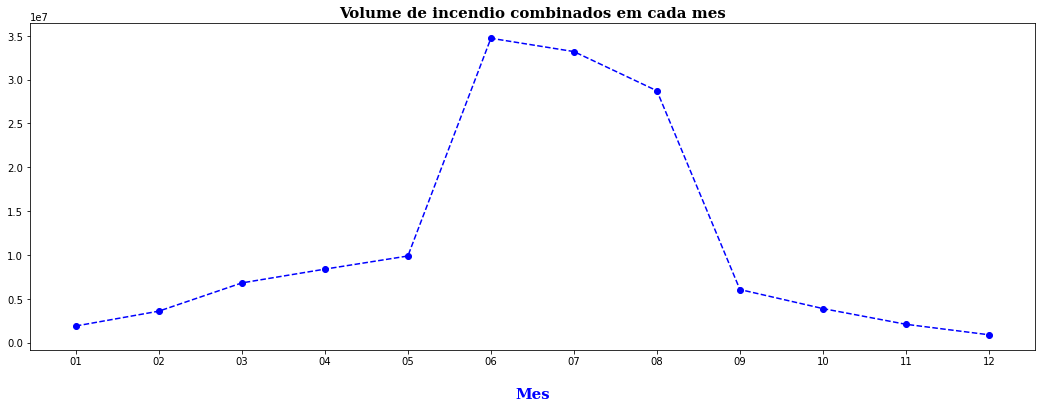

In [40]:
fig, ax = plt.subplots(figsize=(18,6))
    
plt.plot(resultado7.sort_values(['MES'], ascending = True)['MES'], resultado7.sort_values(['MES'],
         ascending = True)['AREA QUEIMADA'], 'b--', marker = 'o')

plt.title(f"Volume de incendio combinados em cada mes", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nMes", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')


plt.show()